# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.colors import rgb2hex
sns.set_style("darkgrid")
plt.style.use('seaborn')

# Import Data

In [2]:
df = pd.read_csv('/content/measures_v2.csv')
df.shape

(1330816, 13)

# Table 1: So we have 13 columns and 1330816 rows

In [3]:
df.describe()

u_q       coolant  ...        torque    profile_id
count  1.330816e+06  1.330816e+06  ...  1.330816e+06  1.330816e+06
mean   5.427900e+01  3.622999e+01  ...  3.110603e+01  4.079306e+01
std    4.417323e+01  2.178615e+01  ...  7.713575e+01  2.504549e+01
min   -2.529093e+01  1.062375e+01  ... -2.464667e+02  2.000000e+00
25%    1.206992e+01  1.869814e+01  ... -1.374265e-01  1.700000e+01
50%    4.893818e+01  2.690014e+01  ...  1.086035e+01  4.300000e+01
75%    9.003439e+01  4.985749e+01  ...  9.159718e+01  6.500000e+01
max    1.330370e+02  1.015985e+02  ...  2.610057e+02  8.100000e+01

[8 rows x 13 columns]

In [4]:
df.head(5)

u_q    coolant  stator_winding  ...    ambient    torque  profile_id
0 -0.450682  18.805172       19.086670  ...  19.850691  0.187101          17
1 -0.325737  18.818571       19.092390  ...  19.850672  0.245417          17
2 -0.440864  18.828770       19.089380  ...  19.850657  0.176615          17
3 -0.327026  18.835567       19.083031  ...  19.850647  0.238303          17
4 -0.471150  18.857033       19.082525  ...  19.850639  0.208197          17

[5 rows x 13 columns]

## Data Types and Statistics Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


## Checking Duplicate Data

In [6]:
duplicated_rows = df[df.duplicated().values == True]
print(f'Number of duplicates: {len(duplicated_rows)}')

Number of duplicates: 0


## Checking Missing Data

In [7]:
df.isnull().sum().sort_values(ascending=False)

profile_id        0
torque            0
ambient           0
stator_yoke       0
pm                0
i_q               0
i_d               0
motor_speed       0
stator_tooth      0
u_d               0
stator_winding    0
coolant           0
u_q               0
dtype: int64

## " u_q ": q component of Voltage measured in Volts0
## " u_d ": d component of Voltage measured in Volts
## " i_q ": q component of Current measured in Amps
##  " i_d ": d component of Current measured in Amps
##  " ambient ": ambient temperature around the stator in °C (measured by a thermal sensor fixed close to stator)
##  " coolant ": motor coolant (water in this case) temperature of the motor in °C (measured by a fixed thermal sensor at coolant outlet)
##  " motor speed ": ambient temperature around the stator in °C (measured by a fixed thermal sensor)
## " stator_tooth ": stator tooth temperature in °C
## " stator_winding ": stator winding temperature in °C
## " stator_yoke ": stator yoke temperature in °C
## " pm ": permanent magnet tooth temperature in °C
## " profile_id ": id of the measurement session
Ps. all the data point are recorded in 2Hz (one row per 0.5 seconds)

## PLOT 1: Getting the measurement of each session based on the profile_ID and as all the data points are recorded in 2HZ means 2 data points per seconds so this will be converted into hours to get the time taken to record per session.

Text(0.5, 0, 'Time (hr)')

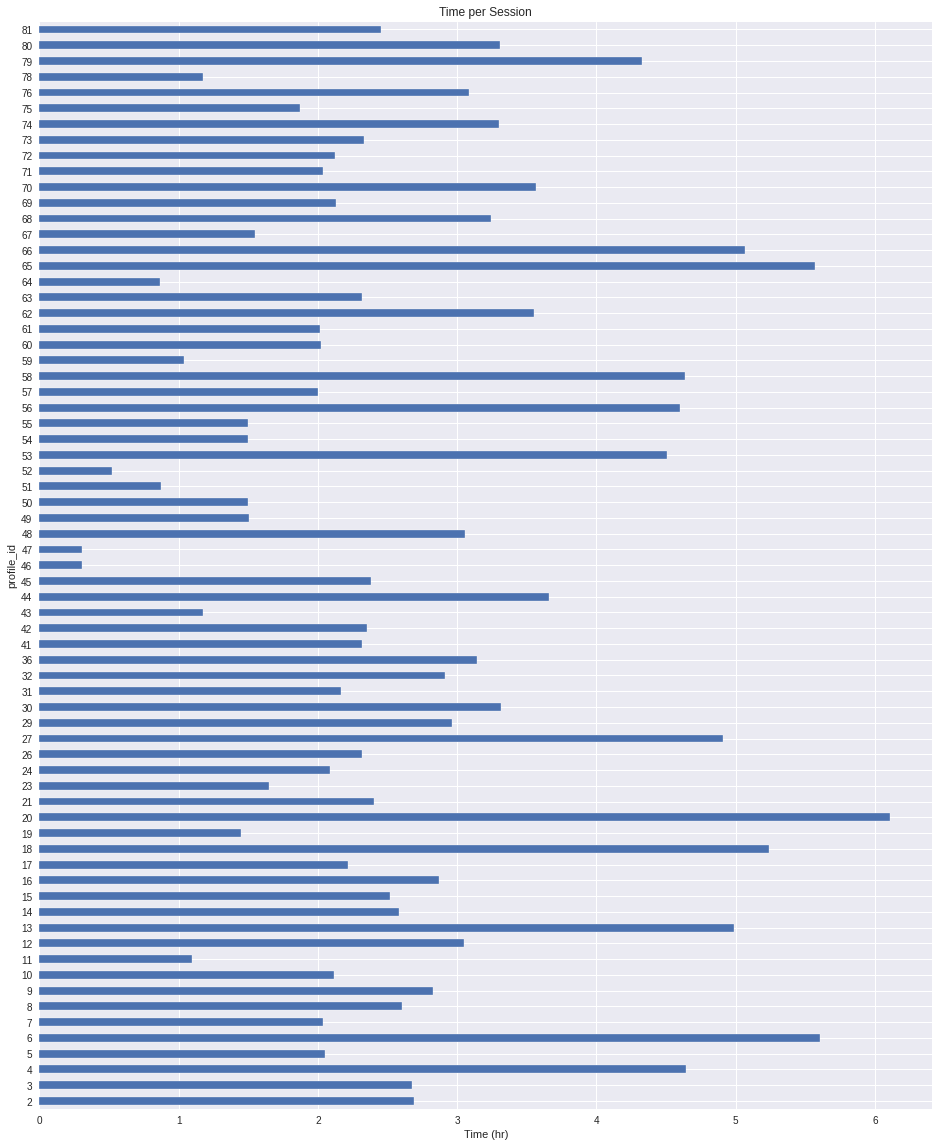

In [8]:
sessions = df.groupby('profile_id').agg('count')['u_d'] / (2 * 3600)
sessions.plot.barh(figsize=(16,20), grid='both', title='Time per Session')
plt.xlabel('Time (hr)')

## Plot 2: Session length distribution - correlation with frequency and time

Text(0.5, 0, 'Time (hr)')

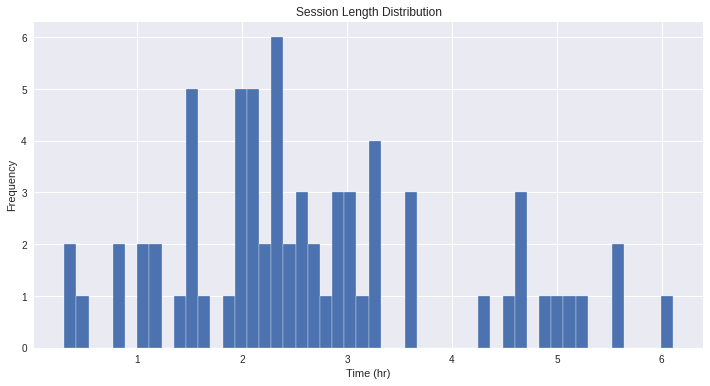

In [9]:
sessions.plot.hist(bins=50, title='Session Length Distribution', figsize=(12,6), grid='both')
plt.xlabel('Time (hr)')

## Plot 3: Correlation between each attribute 

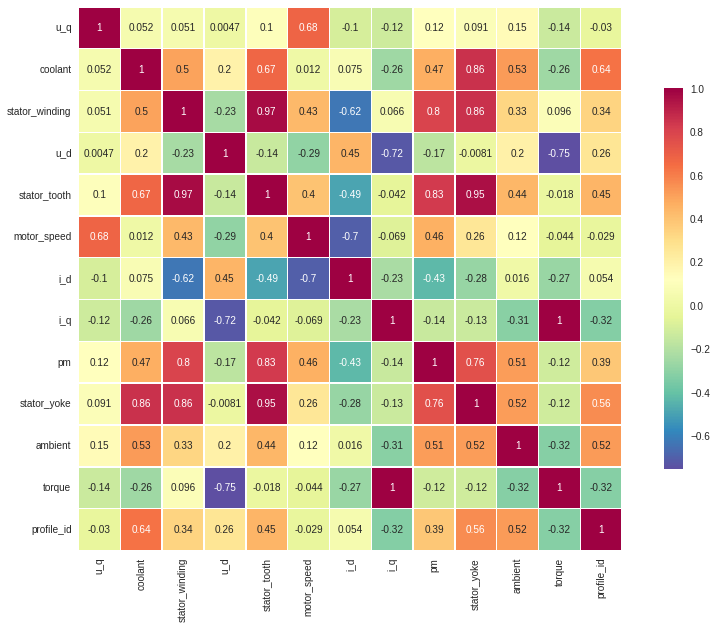

In [10]:
corr = df.corr()
# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#mask=mask,
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='Spectral_r',  square=True, annot=True, linewidth=0.5, cbar_kws={"shrink" : 0.7})

## stator_tooth, stator_winding and stator_yoke are correlated between themselfs
## torque has the maximum correlation coeff - 1 with i_q, and strong negative correlation with u_d
## motor_speed has strong positive correlation with u_q and strong negative correlation with i_d
## stator_yoke is significantly correlated with coolant and less significantly with ambient
## stator_tooth and stator_winding have positive correlation with coolant and negative correlation with i_d
## i_q and u_d have strong negative correlation

## Plot 4: Distribution of the attributes based on mean and median

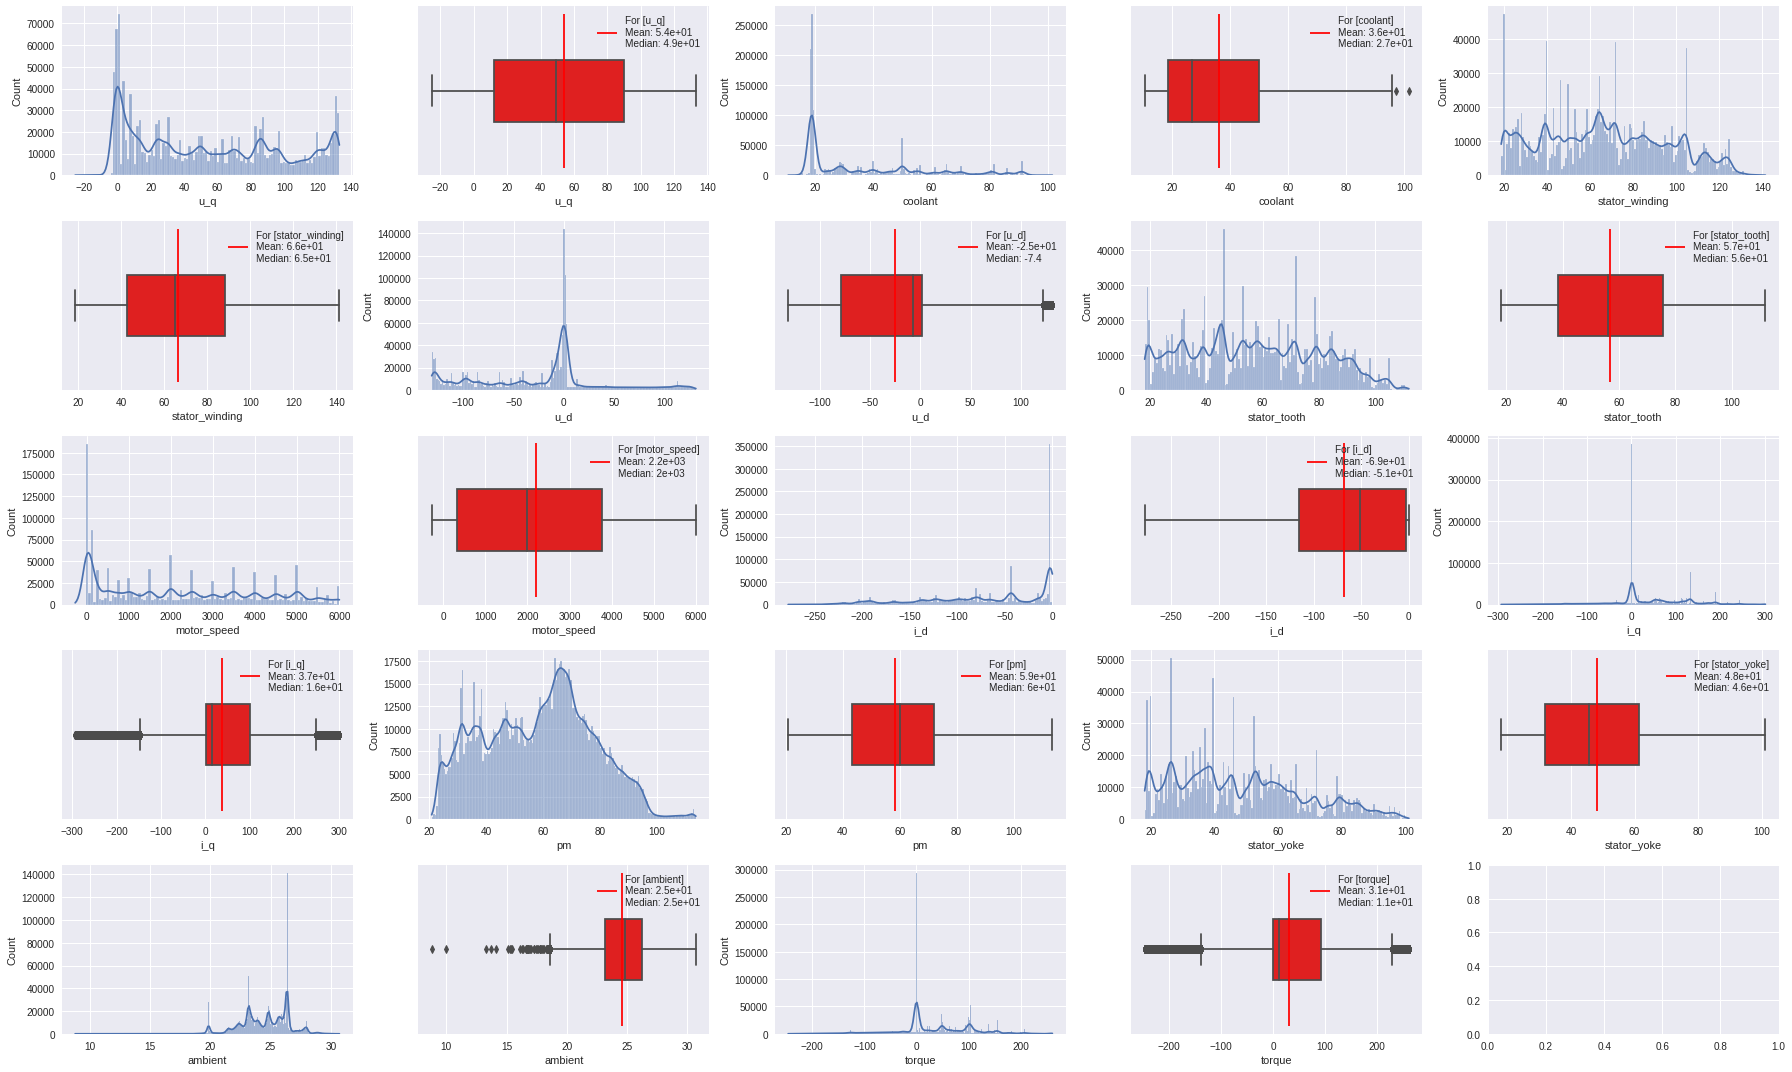

In [11]:
df_cpy = df.drop(['profile_id'], axis=1)

flierprops = dict(markerfacecolor='r', color='r', alpha=0.5)

n_cols = 5
n_rows = int(np.ceil(df_cpy.shape[-1]*2 / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))
for i, (col) in enumerate(list(df_cpy.columns)):
    mean = df_cpy[col].mean()
    median = df_cpy[col].median()
    sns.histplot(df_cpy[col], ax=axes.flatten()[2*i], kde=True)
    sns.boxplot(x=df_cpy[col], orient='h', ax=axes.flatten()[2*i+1], color='r')
    axes.flatten()[2*i+1].vlines(mean, ymin = -1, ymax = 1, color='r', label=f"For [{col}]\nMean: {mean:.2}\nMedian: {median:.2}")
    axes.flatten()[2*i+1].legend()

    if i % n_cols == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
plt.tight_layout()

## PLOT 5: VISUALIZATION OF EACH ATTRIBUTE PER SESSION. WE WILL ONLY CONSIDER THE ATTRIBUTES THAT ARE MEASURED IN 'C'. THE FOLLOWING GRAPHS WILL DESCRIBE THE CHANGES OF ATTRIBUTES AFTER EACH SESSION.

In [14]:
pid_grouped = {pid: df_ for pid, df_ in df.groupby('profile_id')}


def parameter_visualizer(pid_grouped, coi, ylabel, n_cols):
    
    n_rows = int(np.ceil(len(pid_grouped) / n_cols))

    color_list = plt.cm.Set1(np.linspace(0, 1, 10))
    feat_clrs = {k: rgb2hex(color_list[i]) for i, k in enumerate(coi)}

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, n_rows*4))

    for i, (ax, (p_id, df_)) in enumerate(zip(axes.flatten(), pid_grouped.items())):
        for col in coi:
            lines = ax.plot(df_[col].reset_index(drop=True), label=col, color=feat_clrs[col])
        ax.set_title(f'profile {p_id}')
        if i % n_cols == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if i >= (len(pid_grouped) - n_cols):
            ax.set_xlabel('Sample')
    fig.tight_layout()
    _ = ax.legend(ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

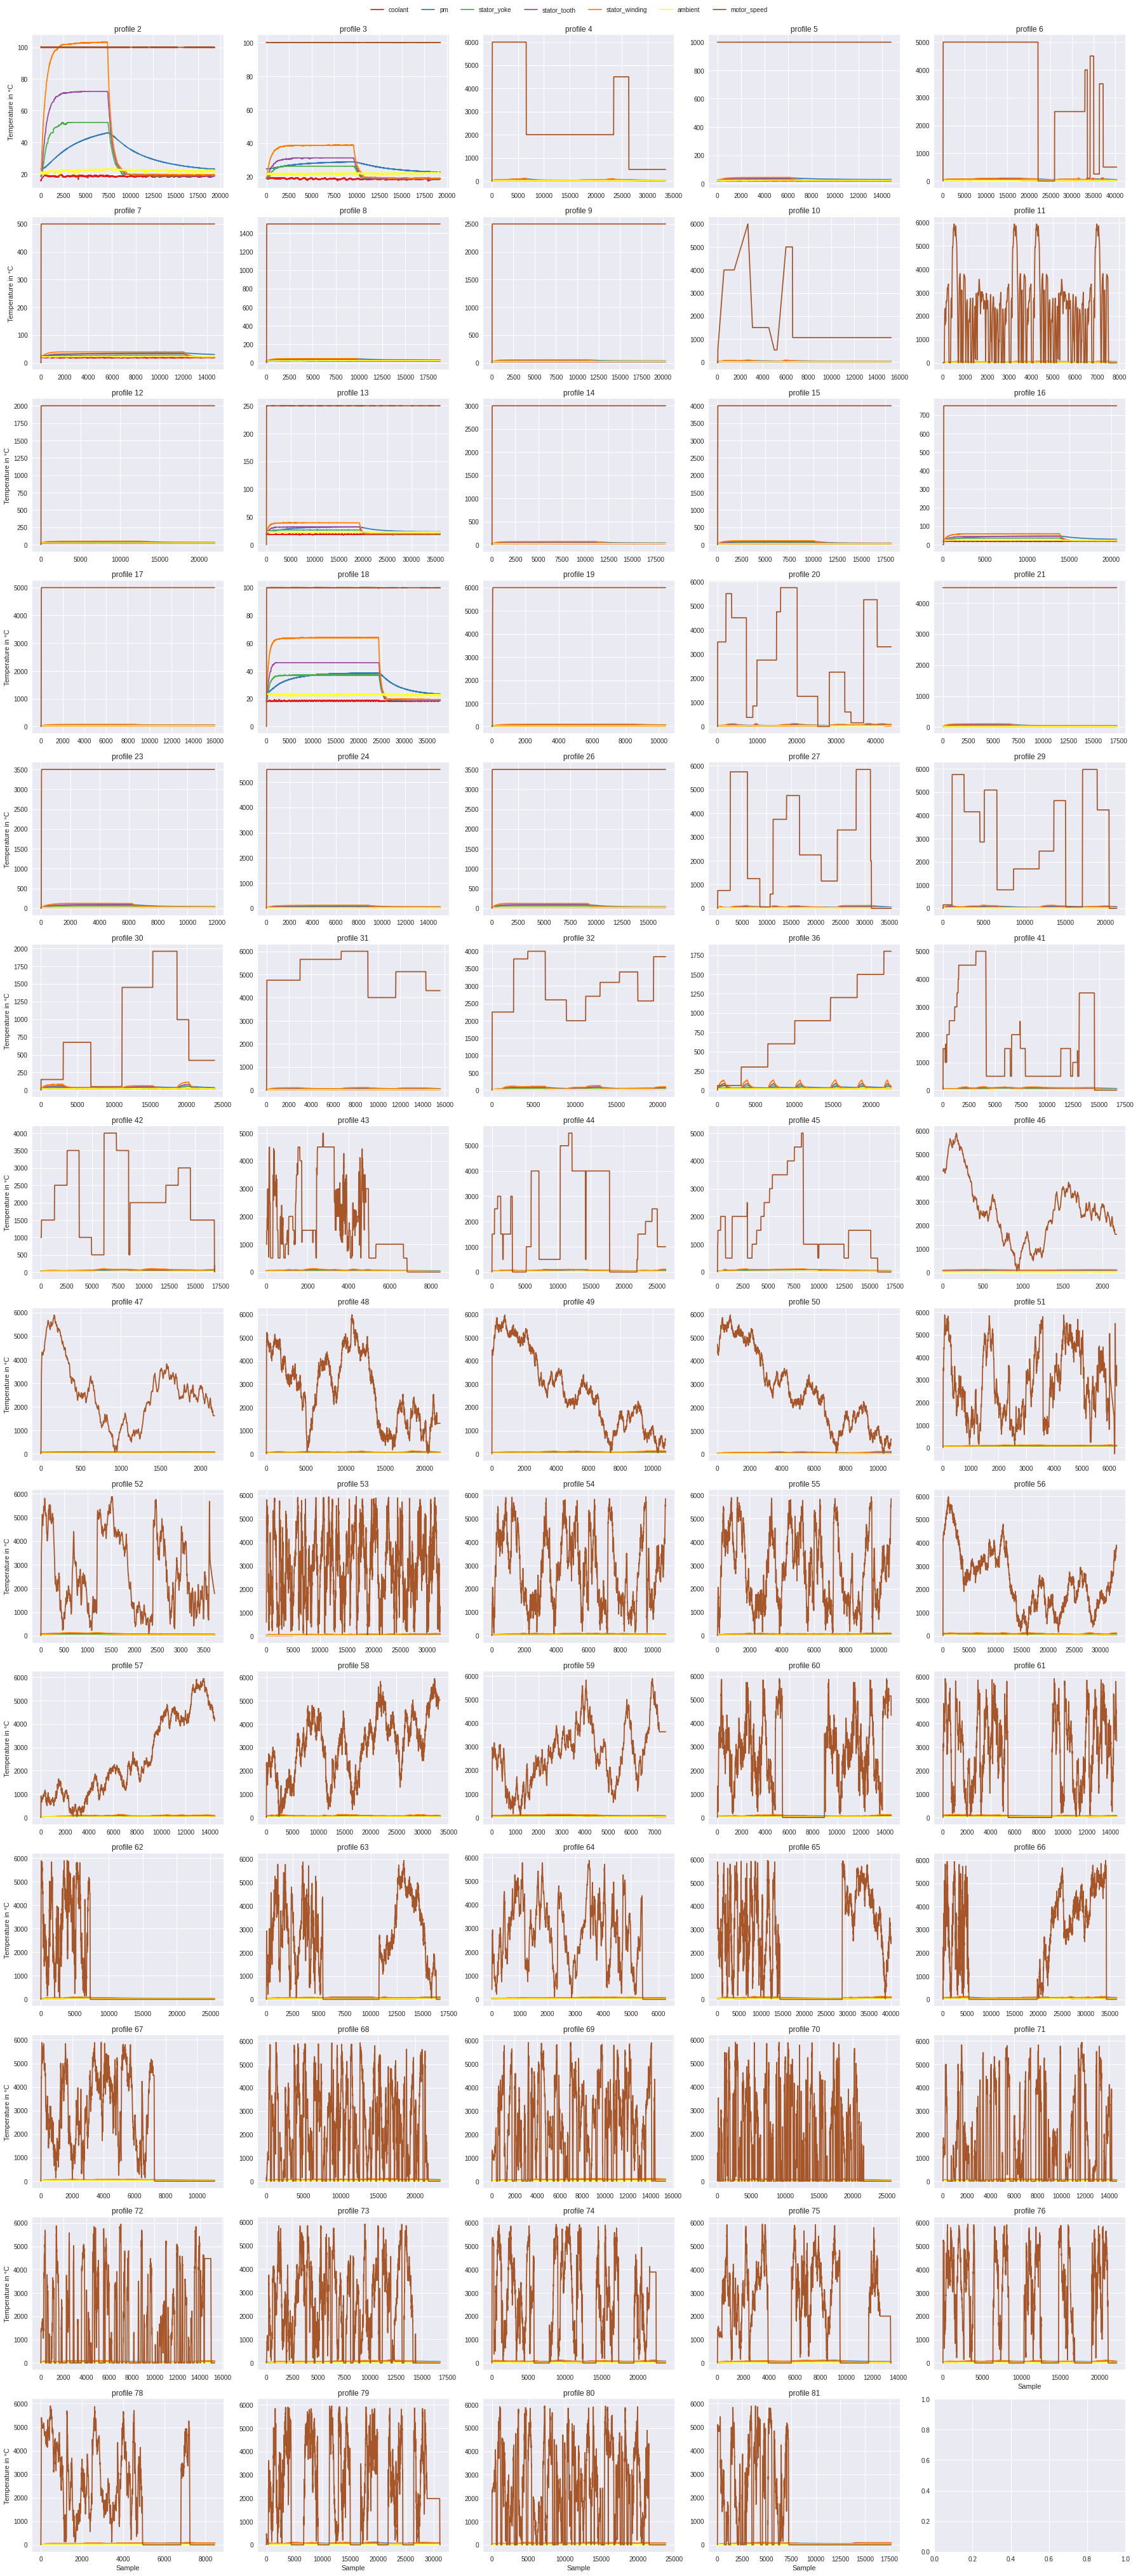

In [15]:
coi = ['coolant', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'ambient','motor_speed']
parameter_visualizer(pid_grouped, coi, ylabel='Temperature in °C', n_cols=5)

## PLOT 6:  VISUALIZING EACH ATTRIBUTE

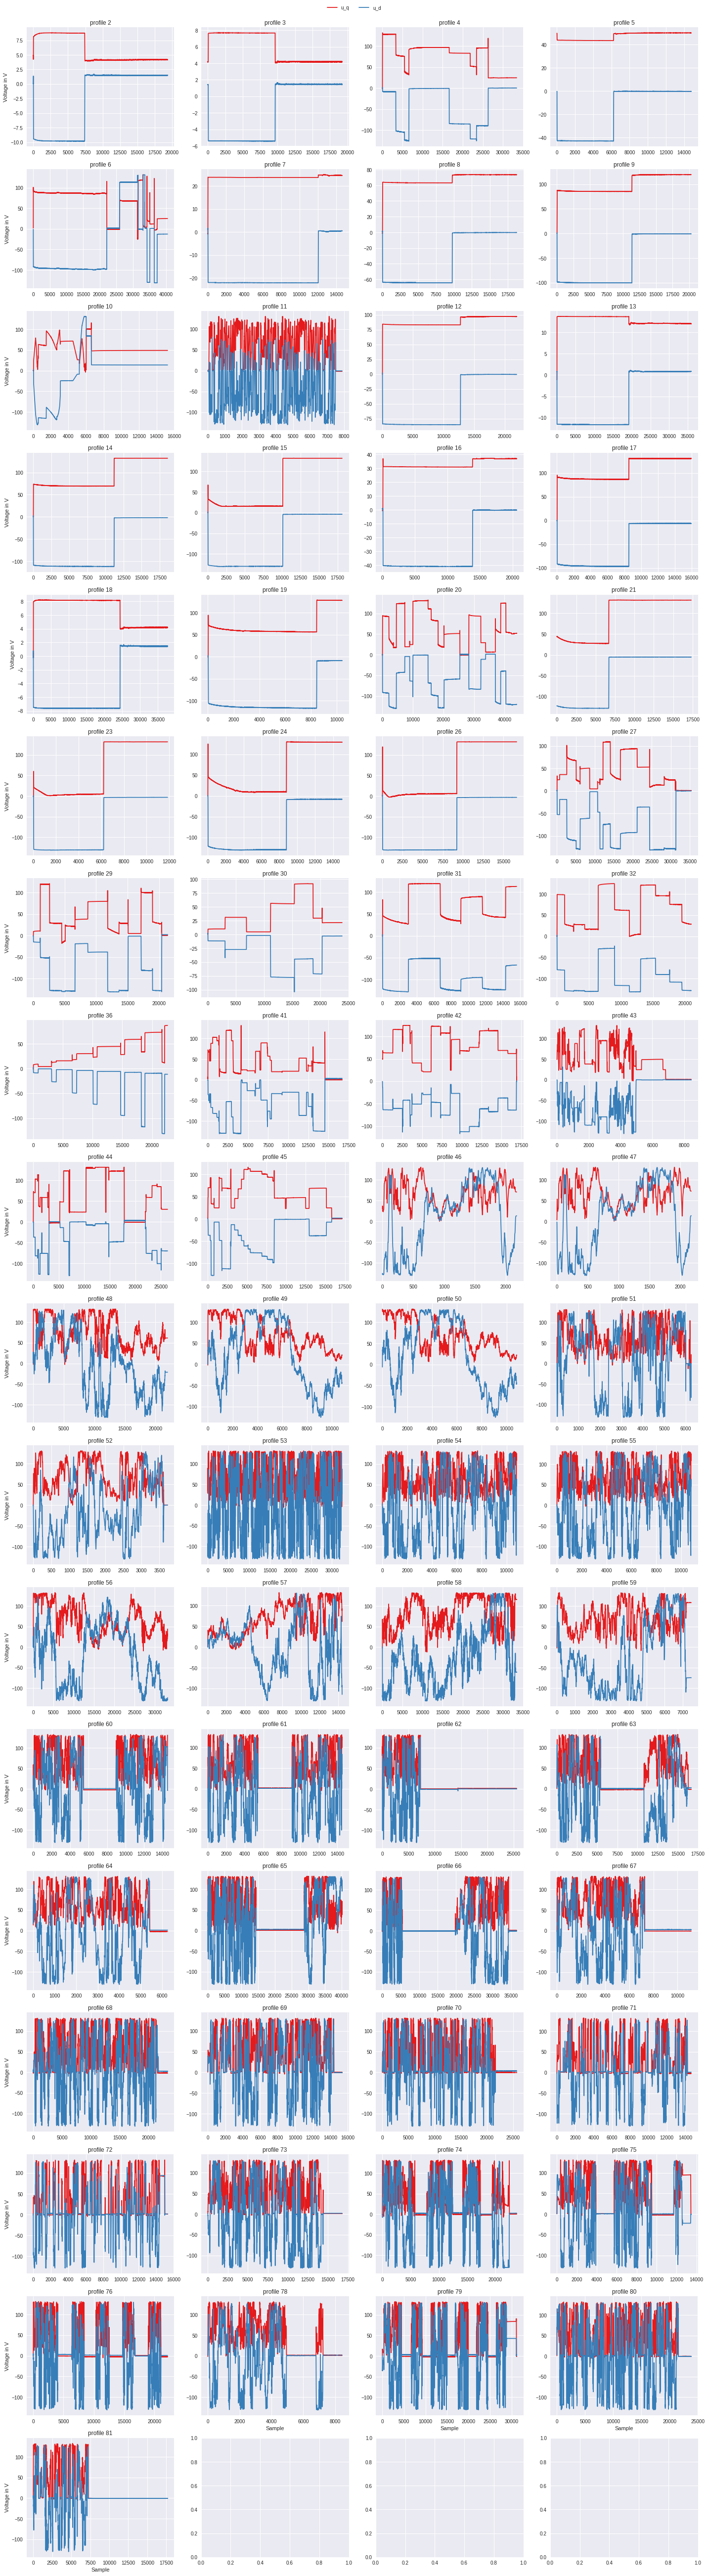

In [16]:
coi = ['u_q', 'u_d']
parameter_visualizer(pid_grouped, coi, 'Voltage in V', 4)

## Plot 7: Multivariate analysis of i_d (Current in d axis measured in Amps) and i_q (Current in q axis measured in Amps) against the profiles

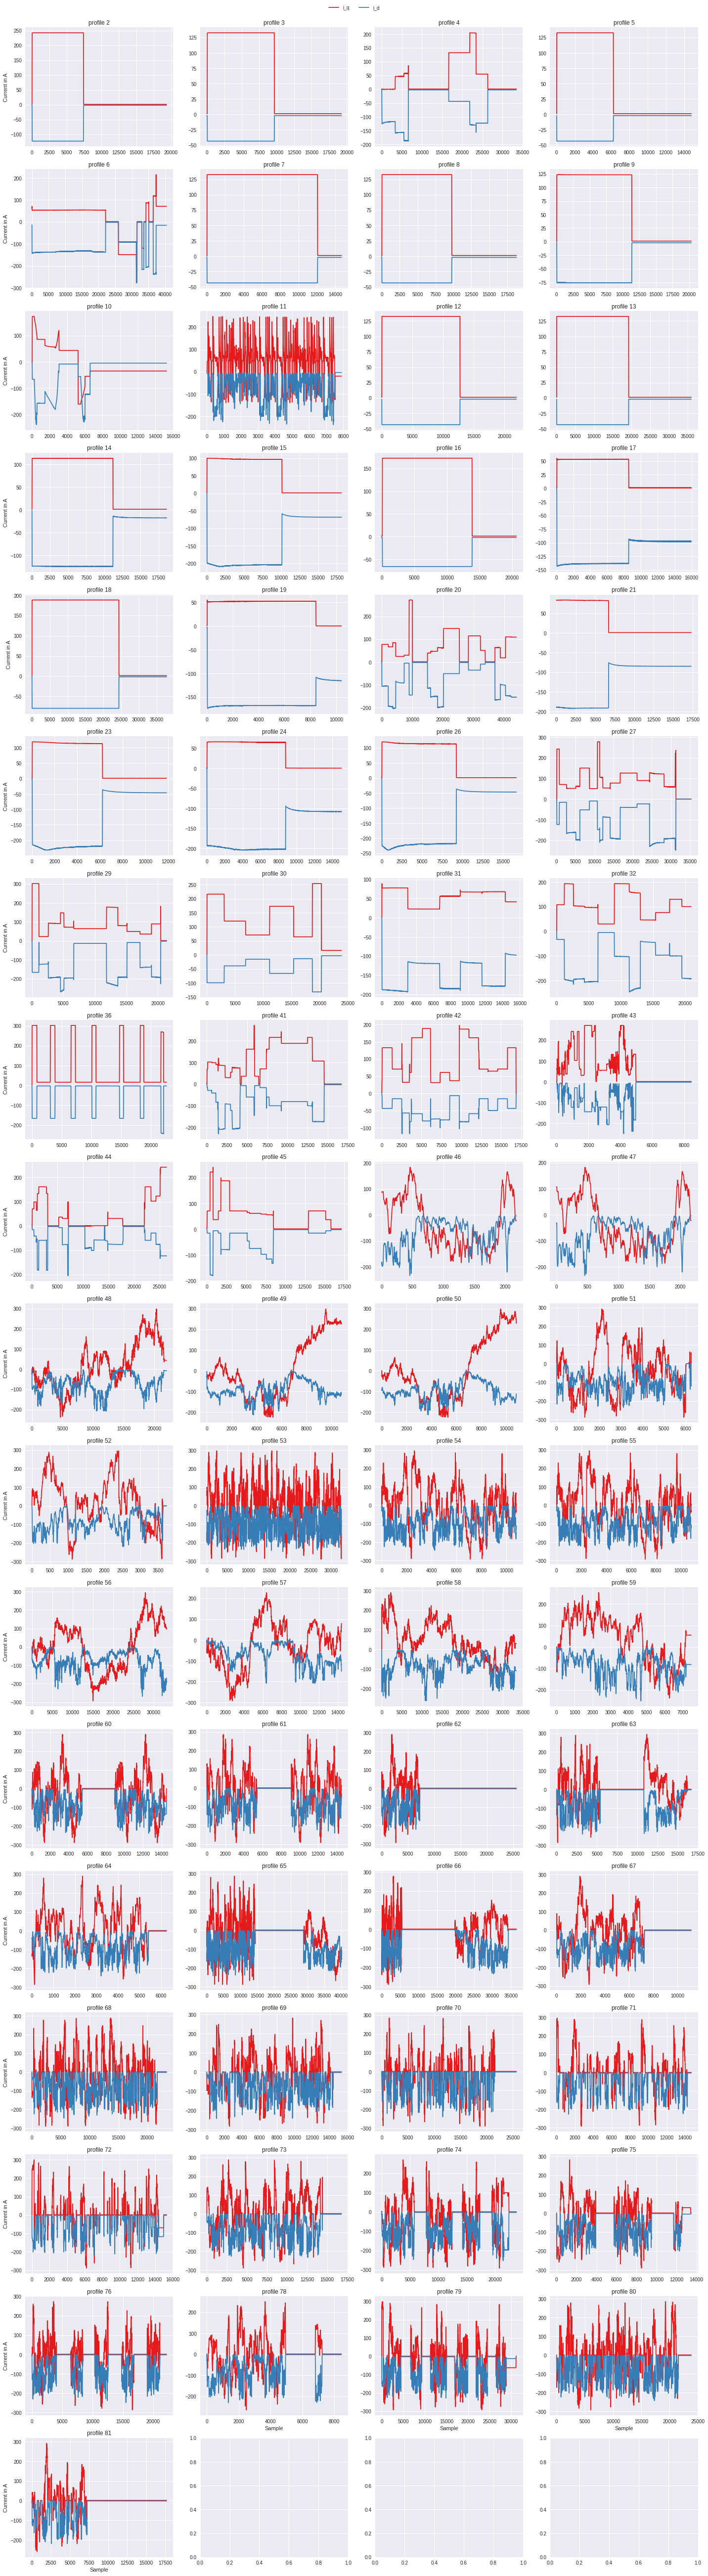

In [17]:
coi = ['i_q', 'i_d']
parameter_visualizer(pid_grouped, coi, 'Current in A', 4)

## Plot 8: Motor Speed visualization against each profile

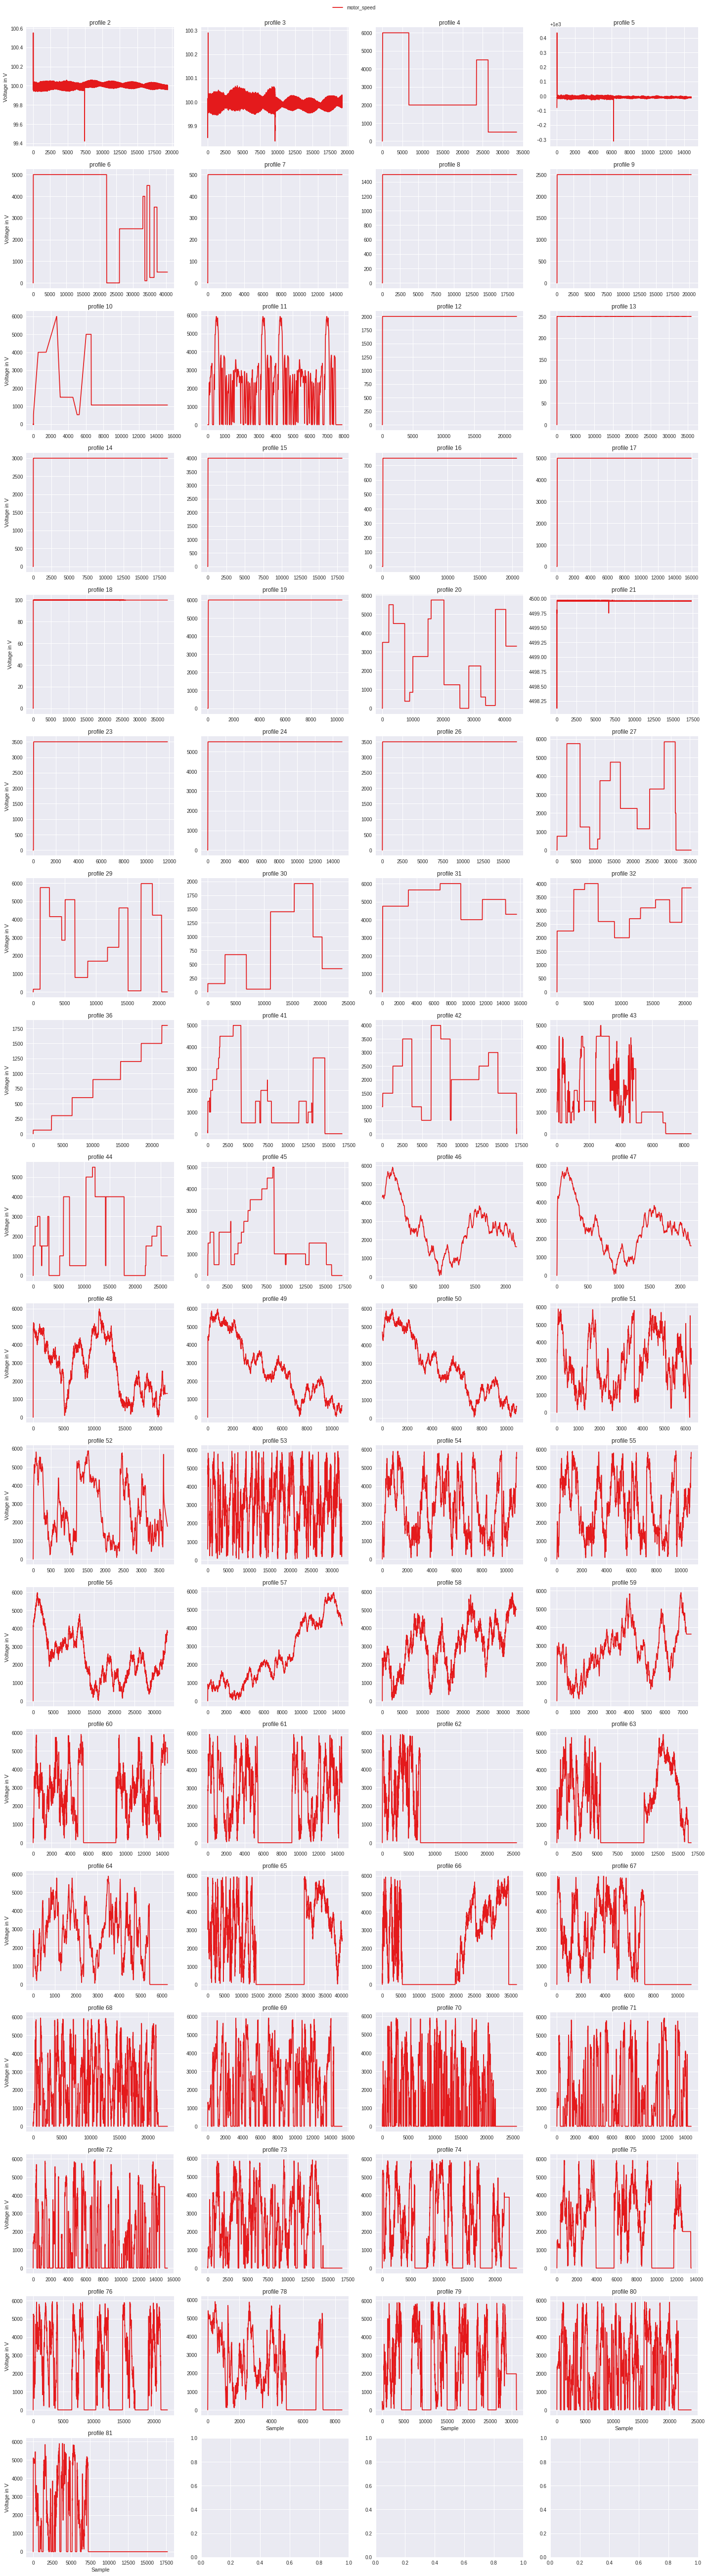

In [18]:
coi = ['motor_speed']
parameter_visualizer(pid_grouped, coi, 'Voltage in V', 4)

## Plot 9: Torque visualization against each profile

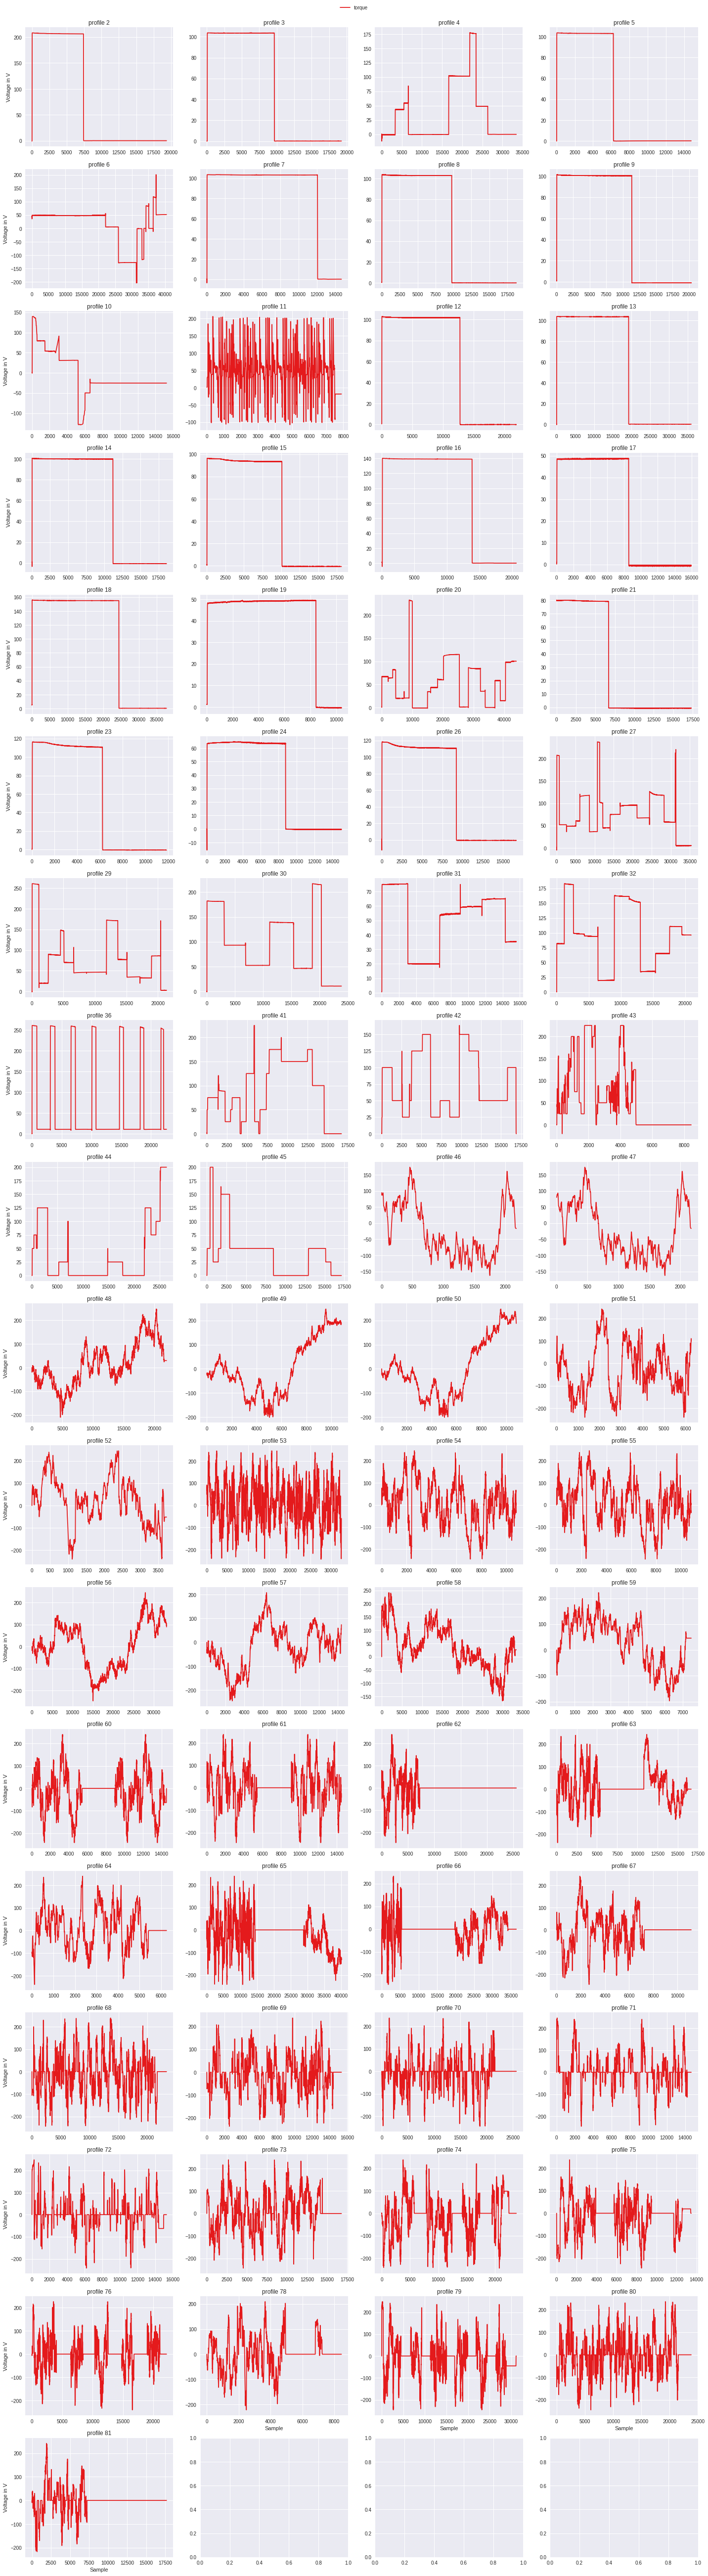

In [19]:
coi = ['torque']
parameter_visualizer(pid_grouped, coi, 'Voltage in V', 4)

## Input and Target Variables

In [26]:
target = df[[ 'coolant','stator_winding', 'stator_tooth','stator_yoke']]
target.head()



coolant  stator_winding  stator_tooth  stator_yoke
0  18.805172       19.086670     18.293219    18.316547
1  18.818571       19.092390     18.294807    18.314955
2  18.828770       19.089380     18.294094    18.326307
3  18.835567       19.083031     18.292542    18.330833
4  18.857033       19.082525     18.291428    18.326662

In [29]:
input = df[[ 'u_q','u_d', 'motor_speed','i_d', 'i_q', 'pm', 'ambient', 'torque']]
input.head()

u_q       u_d  motor_speed  ...         pm    ambient    torque
0 -0.450682 -0.350055     0.002866  ...  24.554214  19.850691  0.187101
1 -0.325737 -0.305803     0.000257  ...  24.538078  19.850672  0.245417
2 -0.440864 -0.372503     0.002355  ...  24.544693  19.850657  0.176615
3 -0.327026 -0.316199     0.006105  ...  24.554018  19.850647  0.238303
4 -0.471150 -0.332272     0.003133  ...  24.565397  19.850639  0.208197

[5 rows x 8 columns]

## Splitting into testing and training

In [ ]:
from sklearn.model_selection import train_test_split 
work_data = df
training_set, testing_set = train_test_split(
    work_data, test_size = 0.2, random_state = 1, shuffle=True)


In [ ]:
training_set.shape

(1064652, 13)

In [ ]:
testing_set.shape

(266164, 13)